In [46]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
%matplotlib inline

### 标量反向传播
#### 定义叶子节点及算子节点

In [2]:
#定义输入张量x
x=torch.Tensor([2])
#初始化权重参数W,偏移量b、并设置require_grad属性为True，为自动求导
w=torch.randn(1,requires_grad=True)
b=torch.randn(1,requires_grad=True)
#实现前向传播
y=torch.mul(w,x) #等价于w*x
z=torch.add(y,b) #等价于y+b
#查看x,w，b页子节点的requite_grad属性
print("x,w,b的require_grad属性分别为：{},{},{}".format(x.requires_grad,w.requires_grad,b.requires_grad))

x,w,b的require_grad属性分别为：False,True,True


#### 查看叶子节点、非叶子节点的其他属性

In [3]:
#查看非叶子节点的requres_grad属性,
print("y，z的requires_grad属性分别为：{},{}".format(y.requires_grad,z.requires_grad))
#因与w，b有依赖关系，故y，z的requires_grad属性也是：True,True
#查看各节点是否为叶子节点
print("x，w，b，y，z的是否为叶子节点：{},{},{},{},{}".format(x.is_leaf,w.is_leaf,b.is_leaf,y.is_leaf,z.is_leaf))
#x，w，b，y，z的是否为叶子节点：True,True,True,False,False
#查看叶子节点的grad_fn属性
print("x，w，b的grad_fn属性：{},{},{}".format(x.grad_fn,w.grad_fn,b.grad_fn))
#因x，w，b为用户创建的，为通过其他张量计算得到，故x，w，b的grad_fn属性：None,None,None
#查看非叶子节点的grad_fn属性
print("y，z的是否为叶子节点：{},{}".format(y.grad_fn,z.grad_fn))
#y，z的是否为叶子节点：<MulBackward0 object at 0x7f923e85dda0>,<AddBackward0 object at 0x7f923e85d9b0>

y，z的requires_grad属性分别为：True,True
x，w，b，y，z的是否为叶子节点：True,True,True,False,False
x，w，b的grad_fn属性：None,None,None
y，z的是否为叶子节点：<MulBackward0 object at 0x000001E3124E27C0>,<AddBackward0 object at 0x000001E3124E22B0>


#### 自动求导，实现梯度方向传播，即梯度的反向传播

In [4]:
#基于z张量进行梯度反向传播,执行backward之后计算图会自动清空，
z.backward()
#如果需要多次使用backward，需要修改参数retain_graph为True，此时梯度是累加的
#z.backward(retain_graph=True)
#查看叶子节点的梯度，x是叶子节点但它无须求导，故其梯度为None
print("参数w,b的梯度分别为:{},{},{}".format(w.grad,b.grad,x.grad))
#参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
#非叶子节点的梯度，执行backward之后，会自动清空
print("非叶子节点y,z的梯度分别为:{},{}".format(y.grad,z.grad))
#非叶子节点y,z的梯度分别为:None,None

参数w,b的梯度分别为:tensor([2.]),tensor([1.]),None
非叶子节点y,z的梯度分别为:None,None


D:\Anaconda3\Install\envs\pytorch\lib\site-packages\torch\_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:475.)
  return self._grad


In [34]:
df = pd.read_csv("../../YMY/gupao/4-2/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [35]:
print(df.shape)
print(df.describe())
print(df.info())

(348, 9)
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.511494   62.560345   59.760632   
std       0.0    3.498380    8.772982   11.813019   11.767406   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000   92.000000   92.000000   77.400000   

           actual      friend  
count  348.000000  348.000000  
mean    62.543103   60.034483  
std     11.794146   15.626179  
min     35.000000   28.000000  
25%     54.000000   47.750000  
50%     62.500000   60.000000  
75%     71.000000   71.000000  
max     92.000000   95.000000  
<class 'p

In [36]:
df[df["month"]==12].shape

(31, 9)

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'temp_2'}>,
        <AxesSubplot:title={'center':'temp_1'}>,
        <AxesSubplot:title={'center':'average'}>],
       [<AxesSubplot:title={'center':'actual'}>,
        <AxesSubplot:title={'center':'friend'}>, <AxesSubplot:>]],
      dtype=object)

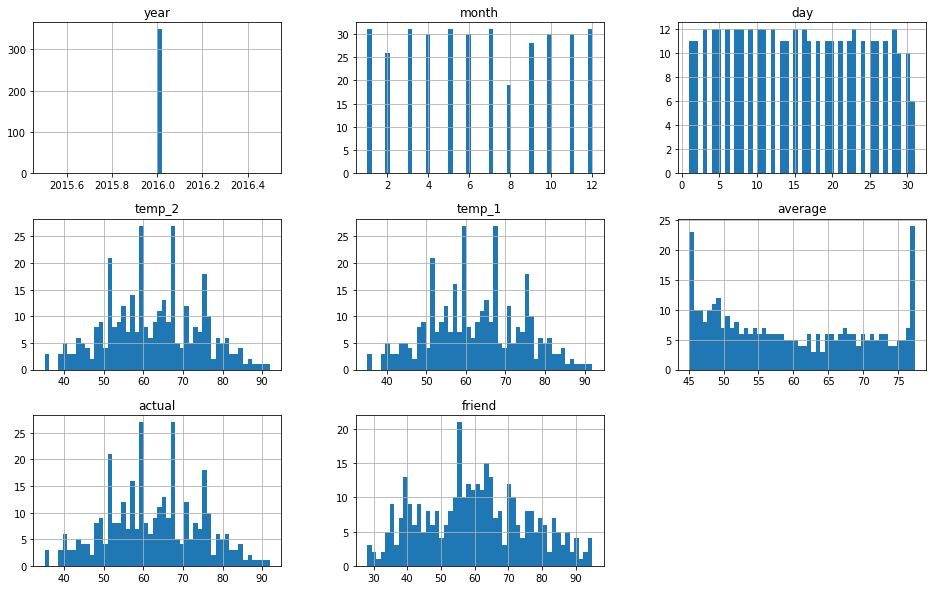

In [37]:
df.hist(bins=50, figsize=(16, 10))

In [38]:
years = df.year
months = df.month
days = df.day
dates = [str(int(year)) + "-" + str(int(month)) + "-" + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [39]:
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [40]:
targets = df["actual"]
df.drop("actual", axis=1, inplace=True)

In [41]:
column_list = df.columns
column_list

Index(['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'friend',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [42]:
df.head()

,year,month,day,temp_2,temp_1,average,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,41,0,0,0,0,0,1,0


In [43]:
# 标准化后，df就从DataFrame变为了 ndarray
df = preprocessing.StandardScaler().fit_transform(df)
df[:5]

array([[ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
        -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.54267126, -1.56929813, -1.49443549,
        -1.33755752,  0.06187741, -0.40961596, -0.40482045,  2.44131112,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.4285208 , -1.48452388, -1.57953835,
        -1.32804474, -0.25855917, -0.40961596, -0.40482045, -0.40961596,
         2.47023092, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.31437034, -1.56929813, -1.83484692,
        -1.31853195, -0.45082111, -0.40961596,  2.47023092, -0.40961596,
        -0.40482045, -0.40482045, -0.41913682, -0.40482045],
       [ 0.        , -1.5678393 , -1.20021989, -1.8236209 , -1.91994977,
        -1.30901917, -1.2198689 , -0.40961596, -0.40482045, -0.40961596,
        -0.40482045, -0.40

### 用pytorch构建网络模型

将ndaaray转化为tensor

In [44]:
x = torch.tensor(df, dtype=torch.float32)
y = torch.tensor(targets, dtype=torch.float32)

随机初始化权重，偏置

<class 'torch.Tensor'>
tensor(2542.8325, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(150.3874, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(144.8965, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(143.2108, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(142.2827, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(141.6833, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(141.2630, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(140.9467, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


tensor(140.6963, grad_fn=<MeanBackward0>)
<class 'torch.Tensor'>
tensor(140.4932, grad_fn=<MeanBackward0>)


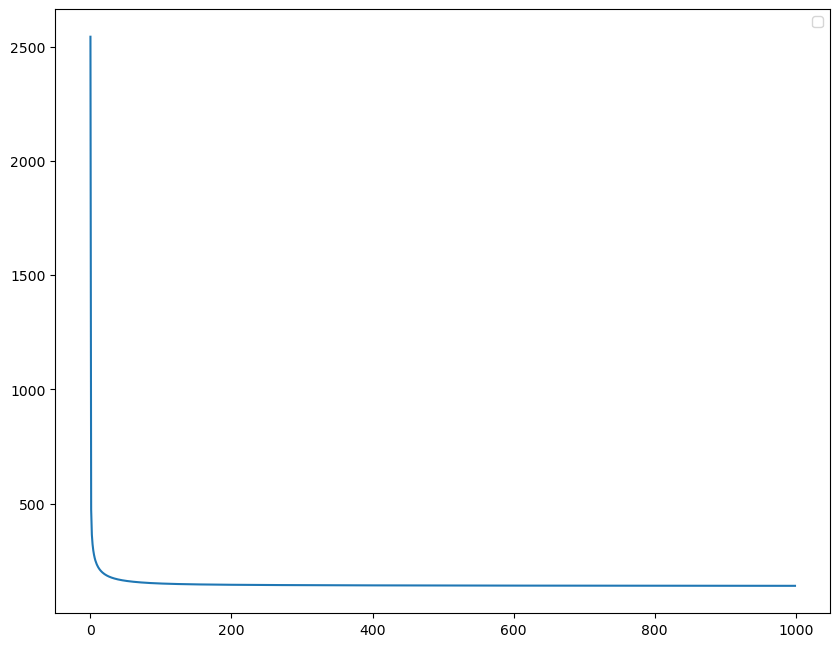

In [16]:
weights_1 = torch.randn((14, 128), dtype=torch.float32, requires_grad=True)
bias_1 = torch.randn(128, dtype=torch.float32, requires_grad=True)
weights_2 = torch.randn((128, 1), dtype=torch.float32, requires_grad=True)
bias_2 = torch.randn(1, dtype=torch.float32, requires_grad=True)

lr = 0.001
losses = []

for epoch in range(1000):
    h1 = x.matmul(weights_1) + bias_1
    z1 = torch.relu(h1)
    pred = z1.matmul(weights_2) + bias_2
    
    # 计算损失
    loss = torch.mean((pred - y)**2)
    losses.append(loss.data.numpy())
    
    if epoch%100==0:
        print(type(loss))
        print(loss)
    loss.backward()
    
    # 更新参数
    weights_1.data.add_(-lr*weights_1.grad.data)
    bias_1.data.add_(-lr*bias_1.grad.data)
    weights_2.data.add_(-lr*weights_2.grad.data)
    bias_2.data.add_(-lr*bias_2.grad.data)
    
    # 每次迭代后清空梯度参数列表
    weights_1.grad.data.zero_()
    bias_1.grad.data.zero_()
    weights_2.grad.data.zero_()
    bias_2.grad.data.zero_()
    
# 损失函数可视化
plt.figure(figsize=(10, 8), dpi=100)
plt.plot(range(1000), losses)
plt.legend()

##### 用简单的方法构造网络

In [17]:
batch = 16
input_size = df.shape[1]
hidden_size = 128
cost = torch.nn.MSELoss(reduction="mean")

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, 1)
)

optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [47]:
for epoch in range(1000):
    batch_loss = []
    for start in range(0, len(x), batch):
        end = start + batch    if start + batch <len(x)  else len(x)
        xx = torch.tensor(x[start:end], dtype=torch.float32, requires_grad=True)
        yy = torch.tensor(y[start:end], dtype=torch.float32, requires_grad=True)
        
        pred = model(xx)
        loss = cost(pred, yy)
        loss.backward(retain_graph=True)
        optim.step()
        batch_loss.append(loss.data.numpy())
    
        # 打印损失
    if epoch % 100==0:
        losses.append(np.mean(batch_loss))
        print(epoch, np.mean(batch_loss))
        
        

C:\Users\11434\AppData\Local\Temp\ipykernel_22876\1867421881.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(x[start:end], dtype=torch.float32, requires_grad=True)
C:\Users\11434\AppData\Local\Temp\ipykernel_22876\1867421881.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y[start:end], dtype=torch.float32, requires_grad=True)
D:\Anaconda3\Install\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:529: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

0 1383.4325
100 4832.848
200 3846.8076
300 4352.6997
400 677.3686
500 2517.5315
600 2469.9897
700 1123.7731
800 1993.1672
900 981.0895


In [48]:
import torchvision